In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import re
import os
import time
import plotly.express as px

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
data.shape

(303, 14)

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Text(0, 0.5, 'COUNT')

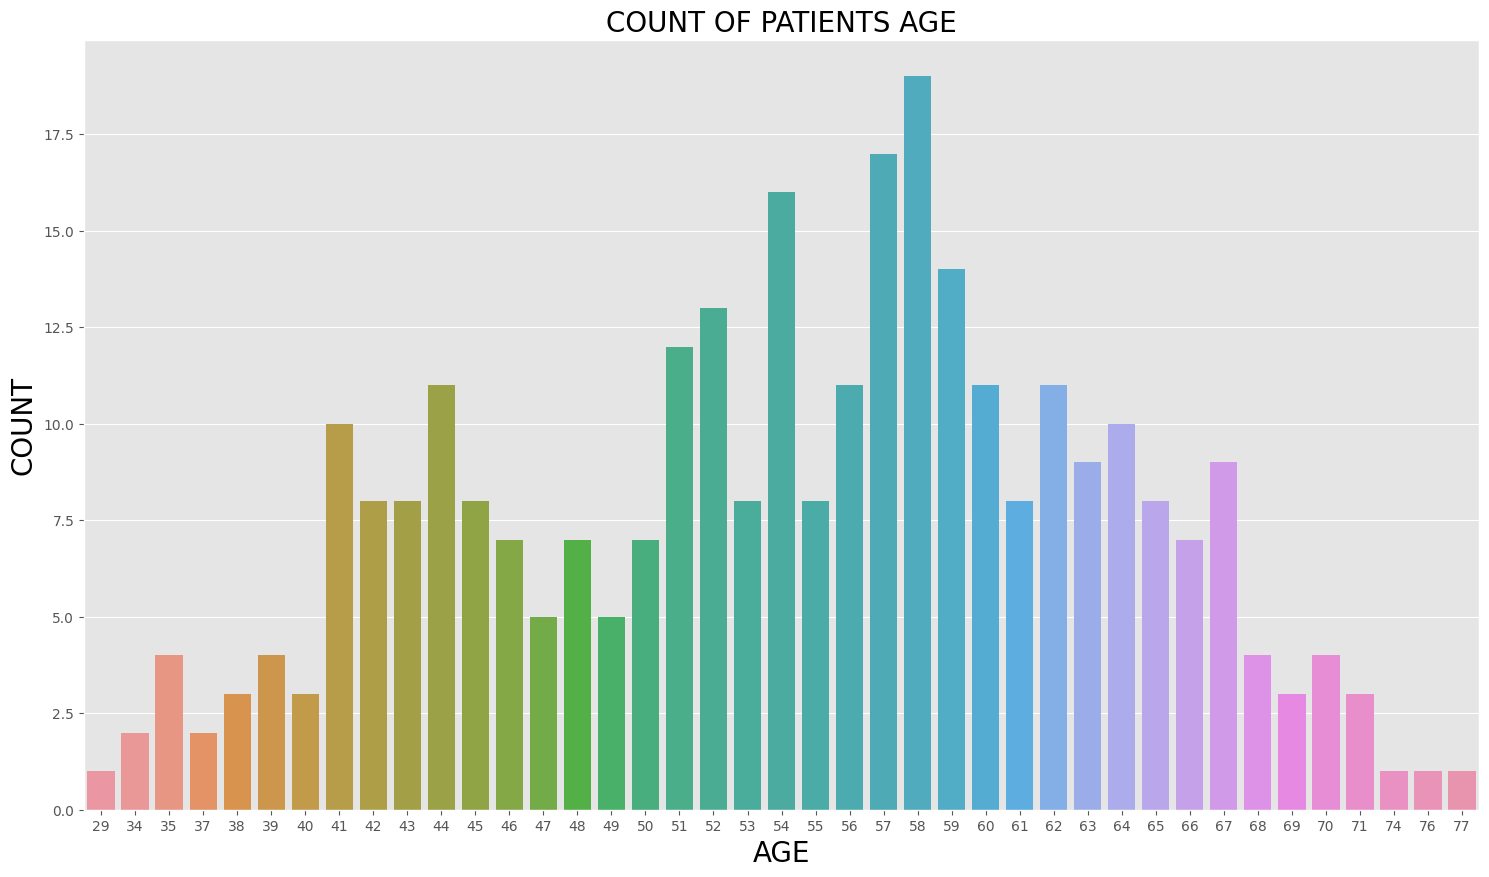

In [8]:
plt.figure(figsize=(18,10))
plt.style.use("ggplot")
sns.countplot(x=data["age"])    #using countplot
plt.title("COUNT OF PATIENTS AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)

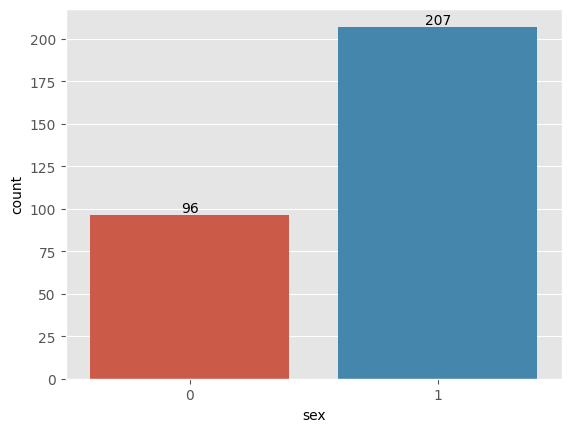

In [9]:
ax=sns.countplot(x=data["sex"]);
ax.bar_label(ax.containers[0]);

In [10]:
s=data["sex"].value_counts().reset_index()
px.pie(s,names="index",values="sex")  #using pie here

In [11]:
df1=data["cp"].value_counts().reset_index()

In [12]:
df1

,index,cp
0,0,143
1,2,87
2,1,50
3,3,23


Text(0, 0.5, 'COUNT')

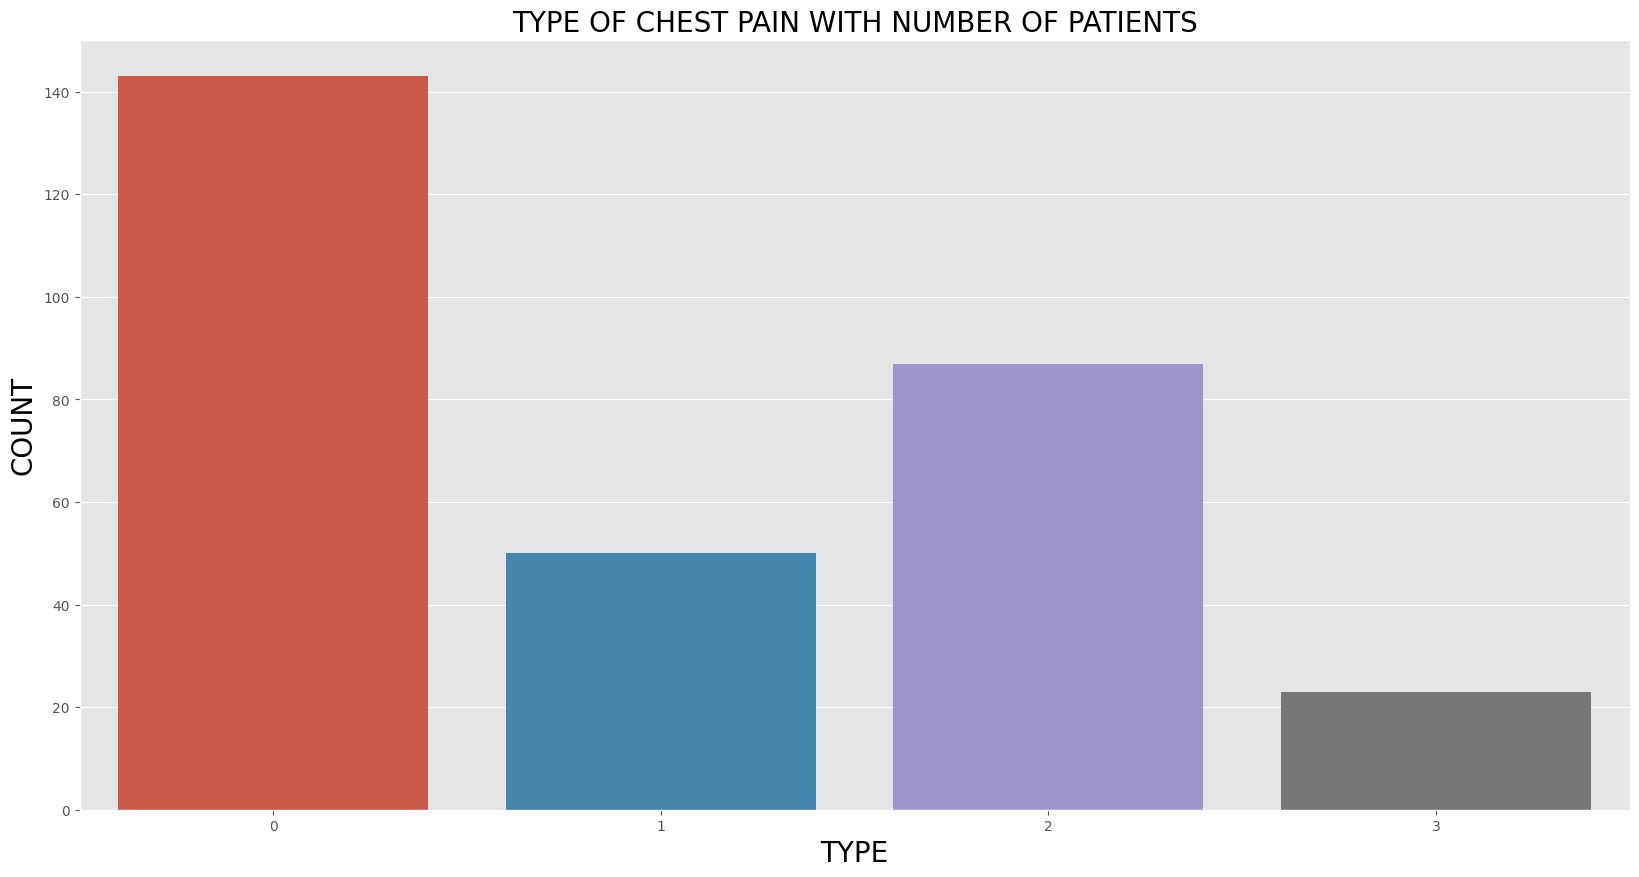

In [13]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.barplot(x=df1["index"],y=df1["cp"])   #using bar here for visualization
plt.title("TYPE OF CHEST PAIN WITH NUMBER OF PATIENTS",fontsize=20)
plt.xlabel("TYPE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)

Text(13.819444444444445, 0.5, 'COUNT')

<Figure size 2000x1000 with 0 Axes>

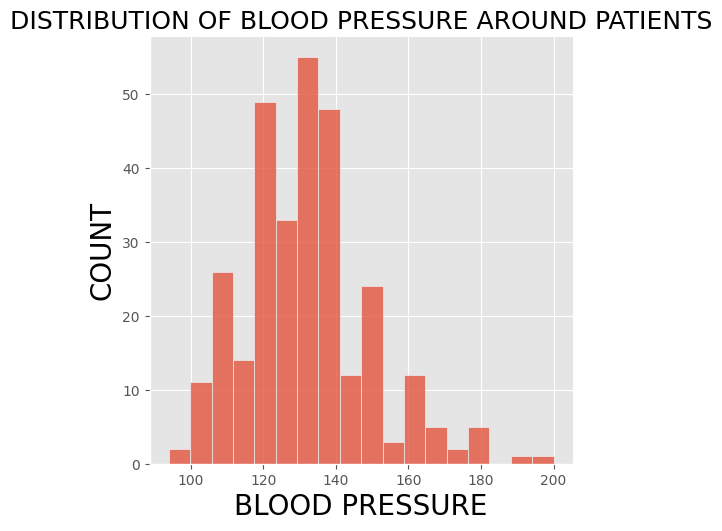

In [14]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.displot(data["trtbps"])   #using displot here
plt.title("DISTRIBUTION OF BLOOD PRESSURE AROUND PATIENTS",fontsize=18)
plt.xlabel("BLOOD PRESSURE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)


Text(13.819444444444445, 0.5, 'COUNT')

<Figure size 2000x1000 with 0 Axes>

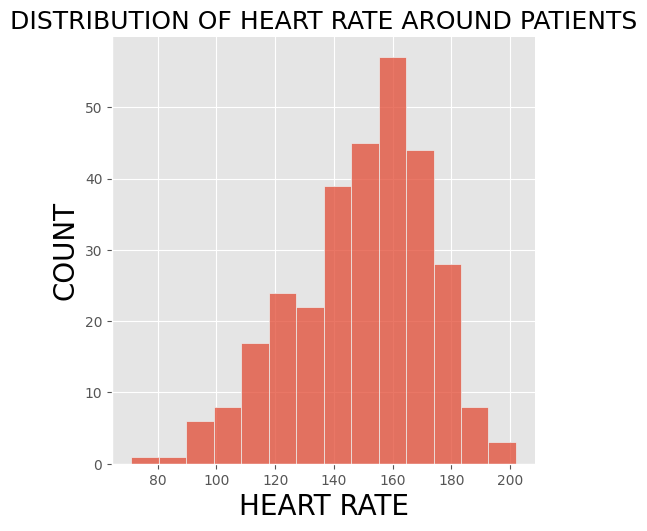

In [15]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.displot(data["thalachh"])
plt.title("DISTRIBUTION OF HEART RATE AROUND PATIENTS",fontsize=18)
plt.xlabel("HEART RATE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)

In [16]:
data[["age","output"]].value_counts().sort_values()

age  output
77   0          1
74   1          1
76   1          1
70   1          1
69   0          1
               ..
59   0          9
52   1          9
57   0         10
54   1         10
58   0         12
Length: 75, dtype: int64

In [17]:
df2=pd.crosstab(data["age"],data["output"]).reset_index()

df2.columns=["age","low_risk","high_risk"]

In [18]:
df2

,age,low_risk,high_risk
0,29,0,1
1,34,0,2
2,35,2,2
3,37,0,2
4,38,1,2
5,39,1,3
6,40,2,1
7,41,1,9
8,42,1,7
9,43,3,5


In [19]:
px.line(df2,df2["age"],df2["high_risk"],title="RISK OF HIGH HEART-ATTACK WITH AGE")

In [20]:
px.line(df2,df2["age"],df2["low_risk"],title="RISK OF LOW HEART-ATTACK WITH AGE")

In [21]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: >

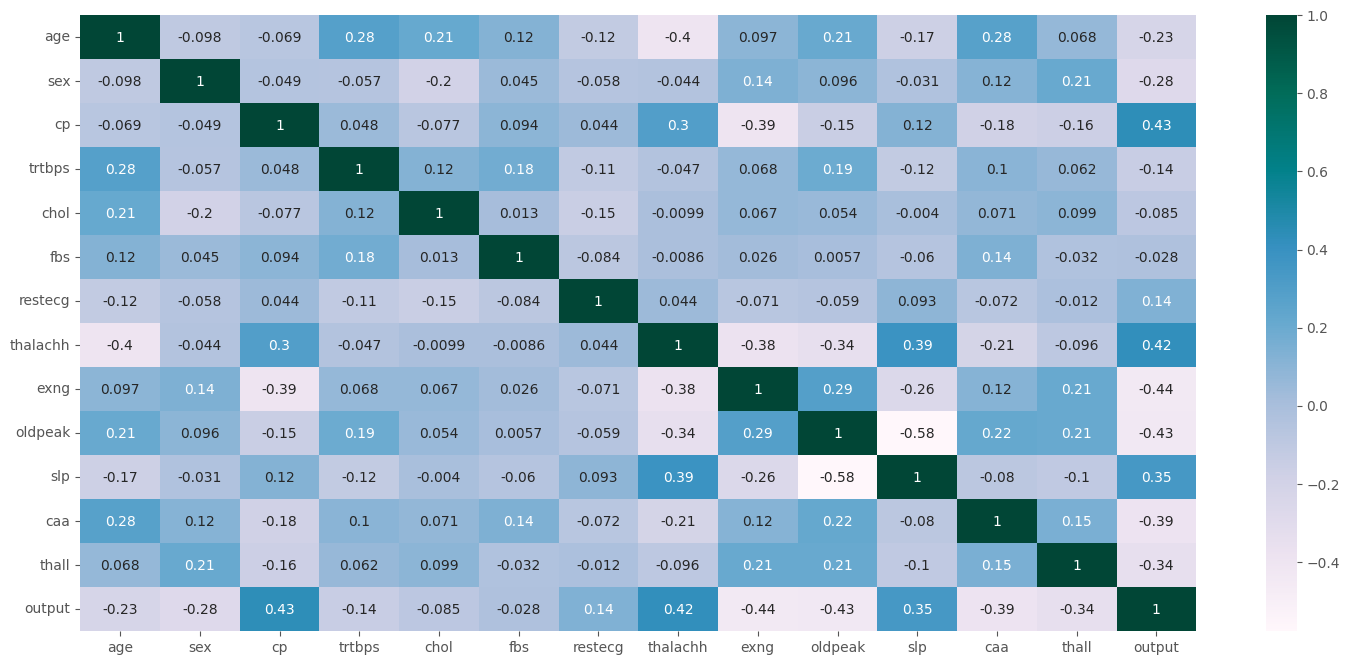

In [22]:
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(),annot=True,cmap="PuBuGn")

In [23]:
x = data.drop(['output'], axis=1)
y = data[['output']]

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [26]:
clf1 = RandomForestClassifier(n_estimators=100)
model1 = clf1.fit(x_train, y_train)
pred = model1.predict(x_test)
accuracy_score(pred, y_test)

C:\Users\Swakshwar Ghosh\AppData\Local\Temp\ipykernel_11072\1620058549.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.8688524590163934

In [27]:
randomforestparam = {'n_estimators':[100,200,50, 1000],
                     'criterion': ["gini", "entropy", "log_loss"],
                     }
grid = GridSearchCV(clf1, randomforestparam, refit=True)
grid.fit(x_train, y_train)

C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d ar

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [100, 200, 50, 1000]})

In [28]:
print(grid.best_params_)

{'criterion': 'gini', 'n_estimators': 50}


In [29]:
clf2 = DecisionTreeClassifier(criterion="gini", splitter="best")

model2 = clf2.fit(x_train, y_train)
pred = model2.predict(x_test)
accuracy_score(pred, y_test)

0.819672131147541

In [30]:
decitiontreeparams = {'criterion':["gini", "entropy", "log_loss"],
                      'max_features': ["auto", "log2", "sqrt"]}

In [31]:
grid = GridSearchCV(clf2, decitiontreeparams, refit=True)
grid.fit(x_train, y_train)

C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\tree\_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\tree\_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\tree\_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\tree\_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'log2', 'sqrt']})

In [32]:
grid.best_params_

{'criterion': 'entropy', 'max_features': 'log2'}

In [33]:
clf3 = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='kd_tree',leaf_size=30)
model3 = clf3.fit(x_train, y_train)
pred = model3.predict(x_test)
accuracy_score(pred, y_test)

C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.5901639344262295

In [34]:
knnparams = {'algorithm': ['ball_tree', 'kd_tree', 'brute'],
             'weights':['uniform','distance'],
             'n_neighbors':[5, 3, 10]}

In [35]:
grid = GridSearchCV(clf3, knnparams, refit = True)
grid.fit(x_train, y_train)
grid.best_params_

C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was 

{'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'distance'}

In [36]:
clf4 = SVC(kernel='rbf', degree=3)
model4 = clf4.fit(x_train, y_train)
pred = model4.predict(x_test)
accuracy_score(pred, y_test)

C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.7213114754098361

In [37]:
svcparams = {'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

In [38]:
grid = GridSearchCV(clf4, svcparams, refit=True)
grid.fit(x_train, y_train)
grid.best_params_

C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the s

{'kernel': 'linear'}

In [39]:
import xgboost as xgb

In [40]:
xgb_clf = xgb.XGBClassifier()
model5 = xgb_clf.fit(x_train, y_train)
pred = model5.predict(x_test)
accuracy_score(pred, y_test)


0.8524590163934426

In [41]:
xgb_params = {'booster': ['gbtree', 'gblinear','dart'],
                'sampling_method': ['uniform', 'subsample', 'gradient_based']}

In [42]:
grid = GridSearchCV(xgb_clf, xgb_params, refit = True)
grid.fit(x_train, y_train)
grid.best_params_

[17:24:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "sampling_method" } are not used.

[17:24:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "sampling_method" } are not used.

[17:24:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "sampling_method" } are not used.

[17:24:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "sampling_method" } are not used.

[17:24:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "sampling_

C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


10 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py", line 

{'booster': 'gblinear', 'sampling_method': 'subsample'}

In [43]:
import joblib

joblib.dump(clf3, 'model.joblib')

['model.joblib']